In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
cash_request=pd.read_csv('./project_dataset/extract - cash request - data analyst.csv')
fees=pd.read_csv('./project_dataset/extract - fees - data analyst - .csv')

In [3]:
# Copia del DataFrame original para evitar modificaciones no deseadas
cr = cash_request.copy()
cr=cr[["amount","created_at","deleted_account_id"]]
cr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23970 entries, 0 to 23969
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   amount              23970 non-null  float64
 1   created_at          23970 non-null  object 
 2   deleted_account_id  2104 non-null   float64
dtypes: float64(2), object(1)
memory usage: 561.9+ KB


In [4]:
# Convertir las fechas de interés a tipo datetime para facilitar su manipulación
cr['created_at'] = pd.to_datetime(cr['created_at'])
cr.head()

,amount,created_at,deleted_account_id
0,100.0,2019-12-10 19:05:21.596873+00:00,NaN
1,100.0,2019-12-10 19:50:12.347780+00:00,NaN
2,100.0,2019-12-10 19:13:35.825460+00:00,NaN
3,99.0,2019-12-10 19:16:10.880172+00:00,NaN
4,100.0,2020-05-06 09:59:38.877376+00:00,NaN


In [5]:
# Crear una columna 'Mes' que represente el mes de la solicitud de adelanto en efectivo de cada cliente
cr['Mes'] = cr['created_at'].dt.to_period('M')
cr.head()

/tmp/ipykernel_52022/4058608649.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  cr['Mes'] = cr['created_at'].dt.to_period('M')


,amount,created_at,deleted_account_id,Mes
0,100.0,2019-12-10 19:05:21.596873+00:00,NaN,2019-12
1,100.0,2019-12-10 19:50:12.347780+00:00,NaN,2019-12
2,100.0,2019-12-10 19:13:35.825460+00:00,NaN,2019-12
3,99.0,2019-12-10 19:16:10.880172+00:00,NaN,2019-12
4,100.0,2020-05-06 09:59:38.877376+00:00,NaN,2020-05


In [6]:
# Crear una columna 'Cohorte' que represente el mes de la primera solicitud de adelanto en efectivo de cada cliente
cr['Cohorte'] = cr.groupby('deleted_account_id')['created_at'].transform('min').dt.to_period('M')
cr.head(10)

/tmp/ipykernel_52022/2503364343.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  cr['Cohorte'] = cr.groupby('deleted_account_id')['created_at'].transform('min').dt.to_period('M')


,amount,created_at,deleted_account_id,Mes,Cohorte
0,100.0,2019-12-10 19:05:21.596873+00:00,NaN,2019-12,NaT
1,100.0,2019-12-10 19:50:12.347780+00:00,NaN,2019-12,NaT
2,100.0,2019-12-10 19:13:35.825460+00:00,NaN,2019-12,NaT
3,99.0,2019-12-10 19:16:10.880172+00:00,NaN,2019-12,NaT
4,100.0,2020-05-06 09:59:38.877376+00:00,NaN,2020-05,NaT
5,100.0,2020-05-23 20:58:55.129432+00:00,NaN,2020-05,NaT
6,100.0,2020-06-16 17:07:38.452652+00:00,NaN,2020-06,NaT
7,100.0,2020-02-10 01:11:53.808270+00:00,309.0,2020-02,2020-01
8,100.0,2020-06-28 12:06:33.712840+00:00,2499.0,2020-06,2020-06
9,90.0,2019-12-10 19:51:23.911206+00:00,NaN,2019-12,NaT


In [7]:
# Calcular el total de monto del adelanto en efectivo por mes para cada cohorte
cohort_data = cr.groupby('Cohorte')['amount'].sum().reset_index()
cohort_data

,Cohorte,amount
0,2019-12,12620.0
1,2020-01,3350.0
2,2020-02,1252.0
3,2020-03,4629.0
4,2020-04,9560.0
5,2020-05,15652.0
6,2020-06,51345.0
7,2020-07,36431.0
8,2020-08,8735.0
9,2020-09,23175.0


In [8]:
# Calcular la cantidad de clientes únicos en cada cohorte
cohort_sizes = cr.groupby('Cohorte').agg(Num_Clientes=('deleted_account_id', 'nunique')).reset_index()
cohort_sizes

,Cohorte,Num_Clientes
0,2019-12,53
1,2020-01,18
2,2020-02,9
3,2020-03,22
4,2020-04,38
5,2020-05,69
6,2020-06,227
7,2020-07,213
8,2020-08,81
9,2020-09,276


In [9]:
# Calcular la cantidad de solicutes de adelanto de efectivo de los clientes de cada cohorte en cada mes
cohort_sizes_monthly = cr.groupby(['Cohorte', 'Mes']).agg(Num_Clientes=('deleted_account_id', 'nunique')).reset_index()
cohort_sizes_monthly

,Cohorte,Mes,Num_Clientes
0,2019-12,2019-12,53
1,2019-12,2020-01,20
2,2019-12,2020-02,11
3,2019-12,2020-03,9
4,2019-12,2020-04,9
5,2019-12,2020-05,6
6,2019-12,2020-06,5
7,2019-12,2020-07,4
8,2019-12,2020-08,2
9,2019-12,2020-10,1


In [10]:
# Calcular la cantidad de clientes en la primera solicitud de adelanto en efectivo de cada cohorte
cohort_sizes_initial = cohort_sizes_monthly.groupby('Cohorte').first()
cohort_sizes_initial

,Mes,Num_Clientes
Cohorte,,
2019-12,2019-12,53
2020-01,2020-01,18
2020-02,2020-02,9
2020-03,2020-03,22
2020-04,2020-04,38
2020-05,2020-05,69
2020-06,2020-06,227
2020-07,2020-07,213
2020-08,2020-08,81


In [11]:
# Calcular la tasa de retención
retention = cohort_sizes_monthly.pivot(index='Cohorte', columns='Mes', values='Num_Clientes').div(cohort_sizes_initial['Num_Clientes'], axis=0)
retention

Mes,2019-12,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11
Cohorte,,,,,,,,,,,,
2019-12,1.0,0.377358,0.207547,0.169811,0.169811,0.113208,0.094340,0.075472,0.037736,NaN,0.018868,NaN
2020-01,NaN,1.000000,0.222222,0.111111,0.055556,0.166667,0.055556,NaN,NaN,NaN,NaN,NaN
2020-02,NaN,NaN,1.000000,NaN,0.111111,0.111111,0.111111,0.111111,0.111111,NaN,NaN,NaN
2020-03,NaN,NaN,NaN,1.000000,0.181818,0.181818,0.181818,0.181818,0.181818,0.136364,NaN,NaN
2020-04,NaN,NaN,NaN,NaN,1.000000,0.342105,0.368421,0.210526,0.078947,0.026316,0.026316,NaN
2020-05,NaN,NaN,NaN,NaN,NaN,1.000000,0.376812,0.289855,0.217391,0.130435,0.057971,0.014493
2020-06,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.281938,0.251101,0.145374,0.088106,0.004405
2020-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.281690,0.131455,0.084507,NaN
2020-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.148148,0.012346,NaN


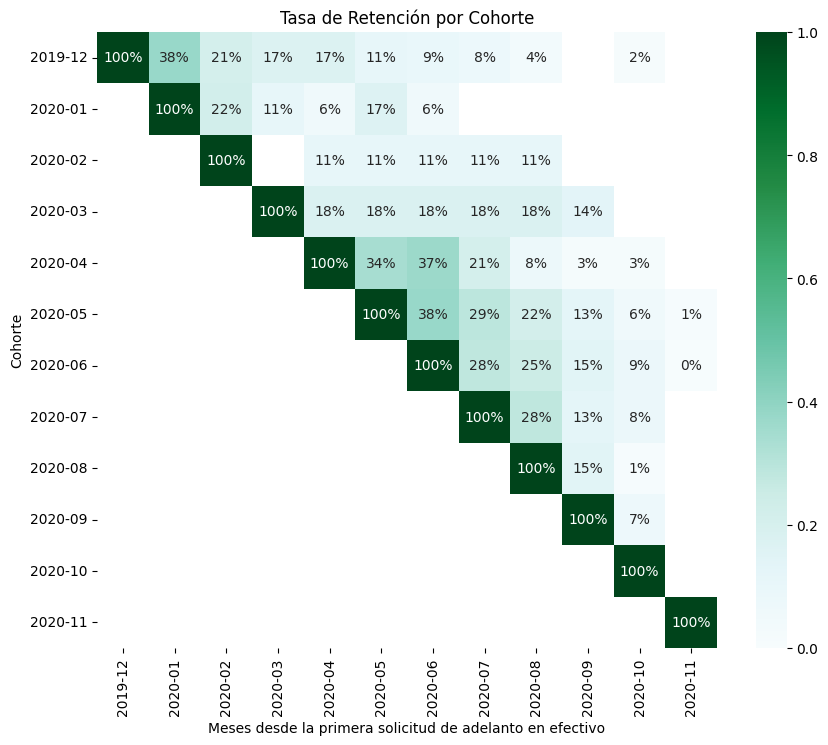

In [12]:
# Graficar la tasa de retención
plt.figure(figsize=(10, 8))
plt.title('Tasa de Retención por Cohorte')
sns.heatmap(data=retention, annot=True, fmt='.0%', vmin=0.0, vmax=1.0, cmap='BuGn')
plt.xlabel('Meses desde la primera solicitud de adelanto en efectivo')
plt.ylabel('Cohorte')
plt.show()